In [1]:
import itertools
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 6

In [10]:
def modelfit(alg, dtrain, predictors, performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['Class'])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_validation.cross_val_score(alg, dtrain[predictors].values,dtrain['Class'].values, cv=cv_folds)#, scoring='roc_auc')
    
    #Print model report:
    print "\nModel Report"
    print "Accuracy : %.4g" % metrics.accuracy_score(dtrain['Class'].values, dtrain_predictions)
    #print "AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['Class'], dtrain_predprob)
    
    if performCV:
        print "CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score))
        
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')

# multi-class

In [2]:
data = pd.read_csv('C:/Users/MAX/Desktop/LargeTrain.csv')
train = pd.DataFrame(data)
#a= lambda x: x-1
#train['Class']=train['Class'].apply(a)
target='Class'
predictors = [x for x in train.columns if x not in [target]]
train

,Virtual,Offset,loc,Import,Imports,var,Forwarder,UINT,LONG,BOOL,...,Img99,Img100,Img101,Img102,Img103,Img104,Img105,Img106,Img107,Class
0,3,3,689,18,6,890,6,39,17,88,...,35148,8687,55835,9078,21355,56302,10380,171979,162674,2
1,3,3,583,15,5,1574,5,6,7,30,...,571,718,1762,642,1820,1675,1100,7702,6551,8
2,3,4,2796,15,5,625,5,58,11,152,...,29872,16910,31708,9000,17586,30719,30062,55331,12946,9
3,3,3,373,27,9,615,9,16,10,34,...,10742,9755,26992,9069,24885,27108,13219,122247,98621,9
4,3,3,77,12,4,66,4,3,0,5,...,962,1307,3119,1172,3522,3245,2001,15501,11864,1
5,3,3,86,6,2,6,2,0,0,1,...,474,561,1389,581,1537,1293,1275,7048,6164,6
6,3,3,469,21,7,291,7,43,15,82,...,33452,15370,63663,15581,42067,63996,21127,221716,176170,2
7,3,3,2090,21,7,4035,7,17,8,40,...,1378,1901,4588,2004,5550,4494,2803,21692,18786,2
8,3,3,691,18,6,597,6,30,16,61,...,43370,13748,66715,14946,39350,71793,18663,219223,167493,2
9,6,6,229,0,8,526,0,11,1,13,...,1031,1076,3040,1097,3216,2985,1577,12860,6860,6


In [14]:
train2=train.ix[range(50)]
train2.values

array([[  3.00000000e+00,   3.00000000e+00,   6.89000000e+02, ...,
          1.71979000e+05,   1.62674000e+05,   2.00000000e+00],
       [  3.00000000e+00,   3.00000000e+00,   5.83000000e+02, ...,
          7.70200000e+03,   6.55100000e+03,   8.00000000e+00],
       [  3.00000000e+00,   4.00000000e+00,   2.79600000e+03, ...,
          5.53310000e+04,   1.29460000e+04,   9.00000000e+00],
       ..., 
       [  3.00000000e+00,   3.00000000e+00,   5.71000000e+02, ...,
          1.76073000e+05,   1.20928000e+05,   2.00000000e+00],
       [  3.00000000e+00,   3.00000000e+00,   4.99000000e+02, ...,
          7.72200000e+03,   6.48200000e+03,   8.00000000e+00],
       [  4.00000000e+00,   4.00000000e+00,   2.10000000e+01, ...,
          0.00000000e+00,   0.00000000e+00,   7.00000000e+00]])

In [77]:
param_test1 = {'n_estimators':range(20,81,10)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1,
min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), 
param_grid = param_test1,n_jobs=4,iid=False, cv=5)
gsearch1.fit(train[predictors],train[target])
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.98611, std: 0.00107, params: {'n_estimators': 20},
  mean: 0.99043, std: 0.00090, params: {'n_estimators': 30},
  mean: 0.99356, std: 0.00101, params: {'n_estimators': 40},
  mean: 0.99402, std: 0.00105, params: {'n_estimators': 50},
  mean: 0.99439, std: 0.00118, params: {'n_estimators': 60},
  mean: 0.99457, std: 0.00094, params: {'n_estimators': 70},
  mean: 0.99476, std: 0.00107, params: {'n_estimators': 80}],
 {'n_estimators': 80},
 0.99475602989308043)

In [4]:
param_test2 = {'max_depth':range(5,16,2), 'min_samples_split':range(200,1001,200)}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=80, 
max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test2,n_jobs=4,iid=False, cv=5)
gsearch2.fit(train[predictors],train[target])
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

([mean: 0.99512, std: 0.00068, params: {'min_samples_split': 200, 'max_depth': 5},
  mean: 0.99485, std: 0.00061, params: {'min_samples_split': 400, 'max_depth': 5},
  mean: 0.99531, std: 0.00045, params: {'min_samples_split': 600, 'max_depth': 5},
  mean: 0.99512, std: 0.00085, params: {'min_samples_split': 800, 'max_depth': 5},
  mean: 0.99494, std: 0.00101, params: {'min_samples_split': 1000, 'max_depth': 5},
  mean: 0.99503, std: 0.00045, params: {'min_samples_split': 200, 'max_depth': 7},
  mean: 0.99503, std: 0.00045, params: {'min_samples_split': 400, 'max_depth': 7},
  mean: 0.99494, std: 0.00077, params: {'min_samples_split': 600, 'max_depth': 7},
  mean: 0.99485, std: 0.00102, params: {'min_samples_split': 800, 'max_depth': 7},
  mean: 0.99476, std: 0.00125, params: {'min_samples_split': 1000, 'max_depth': 7},
  mean: 0.99586, std: 0.00096, params: {'min_samples_split': 200, 'max_depth': 9},
  mean: 0.99531, std: 0.00110, params: {'min_samples_split': 400, 'max_depth': 9},
  

In [5]:
param_test3 = {'min_samples_leaf':range(10,71,10)}
grid3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=80,
max_depth =9,min_samples_split=200,max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test3,n_jobs=4,iid=False, cv=5)
grid3.fit(train[predictors],train[target])
grid3.grid_scores_, grid3.best_params_, grid3.best_score_

([mean: 0.99531, std: 0.00102, params: {'min_samples_leaf': 10},
  mean: 0.99549, std: 0.00124, params: {'min_samples_leaf': 20},
  mean: 0.99522, std: 0.00122, params: {'min_samples_leaf': 30},
  mean: 0.99494, std: 0.00105, params: {'min_samples_leaf': 40},
  mean: 0.99531, std: 0.00102, params: {'min_samples_leaf': 50},
  mean: 0.99540, std: 0.00105, params: {'min_samples_leaf': 60},
  mean: 0.99531, std: 0.00079, params: {'min_samples_leaf': 70}],
 {'min_samples_leaf': 20},
 0.99549284850189945)

In [7]:
param_test4 = {'max_features':range(7,50,2)}
grid4 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=80,max_depth =9,min_samples_split=200, 
subsample=0.8, random_state=10,min_samples_leaf=20)
,param_grid = param_test4,n_jobs=4,iid=False, cv=5 )
grid4.fit(train[predictors],train[target])
grid4.grid_scores_, grid4.best_params_, grid4.best_score_

([mean: 0.99420, std: 0.00103, params: {'max_features': 7},
  mean: 0.99457, std: 0.00094, params: {'max_features': 9},
  mean: 0.99457, std: 0.00068, params: {'max_features': 11},
  mean: 0.99503, std: 0.00128, params: {'max_features': 13},
  mean: 0.99466, std: 0.00194, params: {'max_features': 15},
  mean: 0.99494, std: 0.00120, params: {'max_features': 17},
  mean: 0.99531, std: 0.00160, params: {'max_features': 19},
  mean: 0.99457, std: 0.00121, params: {'max_features': 21},
  mean: 0.99531, std: 0.00089, params: {'max_features': 23},
  mean: 0.99494, std: 0.00112, params: {'max_features': 25},
  mean: 0.99522, std: 0.00138, params: {'max_features': 27},
  mean: 0.99540, std: 0.00182, params: {'max_features': 29},
  mean: 0.99485, std: 0.00114, params: {'max_features': 31},
  mean: 0.99531, std: 0.00134, params: {'max_features': 33},
  mean: 0.99522, std: 0.00111, params: {'max_features': 35},
  mean: 0.99522, std: 0.00090, params: {'max_features': 37},
  mean: 0.99503, std: 0.00

In [8]:
param_test5 = {'subsample':[0.6,0.7,0.75,0.8,0.85,0.9]}
gsearch5= GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=80,max_depth =9,min_samples_split=200, 
subsample=0.8, random_state=10,min_samples_leaf=20,max_features=29),
param_grid= param_test5,n_jobs=4,iid=False, cv=5)
gsearch5.fit(train[predictors],train[target])
gsearch5.grid_scores_, gsearch5.best_params_, gsearch5.best_score_

([mean: 0.99439, std: 0.00106, params: {'subsample': 0.6},
  mean: 0.99503, std: 0.00121, params: {'subsample': 0.7},
  mean: 0.99476, std: 0.00150, params: {'subsample': 0.75},
  mean: 0.99540, std: 0.00182, params: {'subsample': 0.8},
  mean: 0.99522, std: 0.00153, params: {'subsample': 0.85},
  mean: 0.99531, std: 0.00135, params: {'subsample': 0.9}],
 {'subsample': 0.8},
 0.99540051473815494)


Model Report
Accuracy : 1
CV Score : Mean - 0.9954921 | Std - 0.000935757 | Min - 0.9944802 | Max - 0.997235


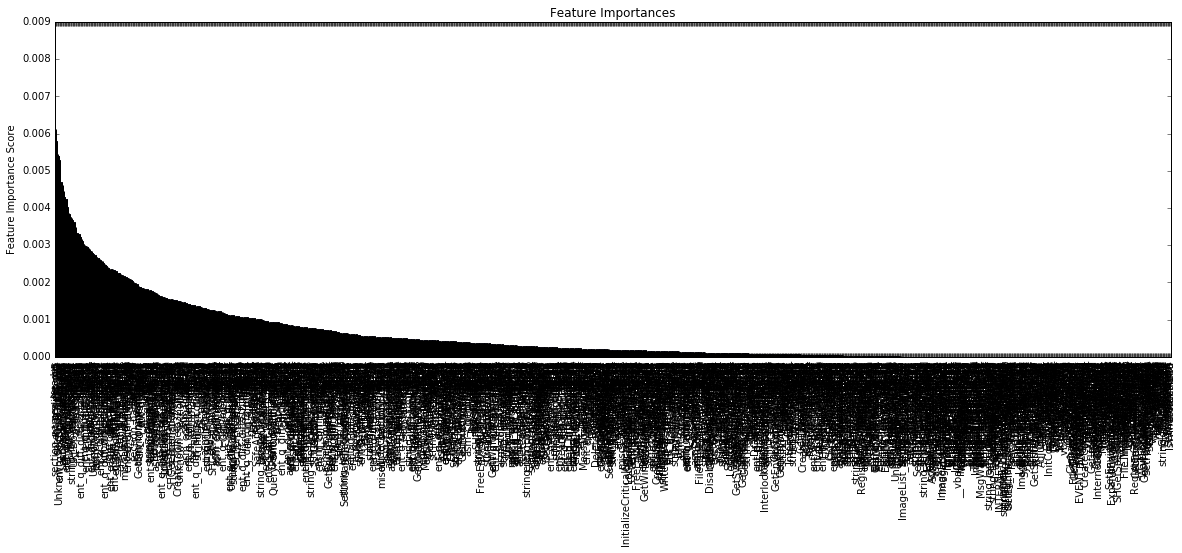

In [12]:
gbm1 = GradientBoostingClassifier(learning_rate=0.1, n_estimators=80,max_depth=9,min_samples_split=200,min_samples_leaf=20,
subsample=0.8,max_features=29,warm_start=True)
modelfit(gbm1, train, predictors)

<function matplotlib.pyplot.show>

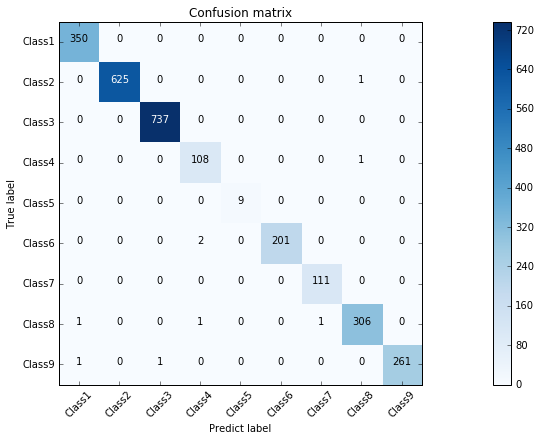

In [3]:
def plot_confusion_matrix(cm , classes , normalize=False , title='Confusion matrix' , cmap=plt.cm.Blues):
    plt.imshow(cm , interpolation='nearest' , cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks , classes , rotation=45)
    plt.yticks(tick_marks , classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
    #else:
        #print('Confusion matrix , without normalization')
    #print(cm)
    
    thresh = cm.max()/2.
    for i , j in itertools.product(range(cm.shape[0]) , range(cm.shape[1])):
        plt.text(j , i , cm[i,j] , horizontalalignment='center' , color='white' if cm[i,j]>thresh else 'black')
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predict label')
    
target='Class'
predictors = [x for x in train.columns if x not in [target]]
class_name = ['Class' + str(x) for x in range(1,10)]
X = data[predictors]
y = data[target]

X_train , X_test , y_train , y_test = train_test_split(X, y , random_state=0)
clf = GradientBoostingClassifier(n_estimators=80,max_depth=9,min_samples_split=200,min_samples_leaf=20,subsample=0.8,max_features=29)
clf.fit(X_train , y_train)
y_pred = clf.predict(X_test)

cnf_matrix = confusion_matrix(y_test , y_pred)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix,classes=class_name,title='Confusion matrix')
plt.show